In [9]:
import pandas as pd
import numpy as np
import sqlite3
from matplotlib import pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [65]:
with sqlite3.connect("../db.sqlite3") as conn:
    query = """
    SELECT *
    FROM restaurant_orderitem roi
    JOIN restaurant_order ro ON roi.order_id = ro.id
    JOIN restaurant_product rp ON roi.product_id = rp.id
    """
    df = pd.read_sql(query, conn)
    
df.to_csv("restaurant.csv")

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

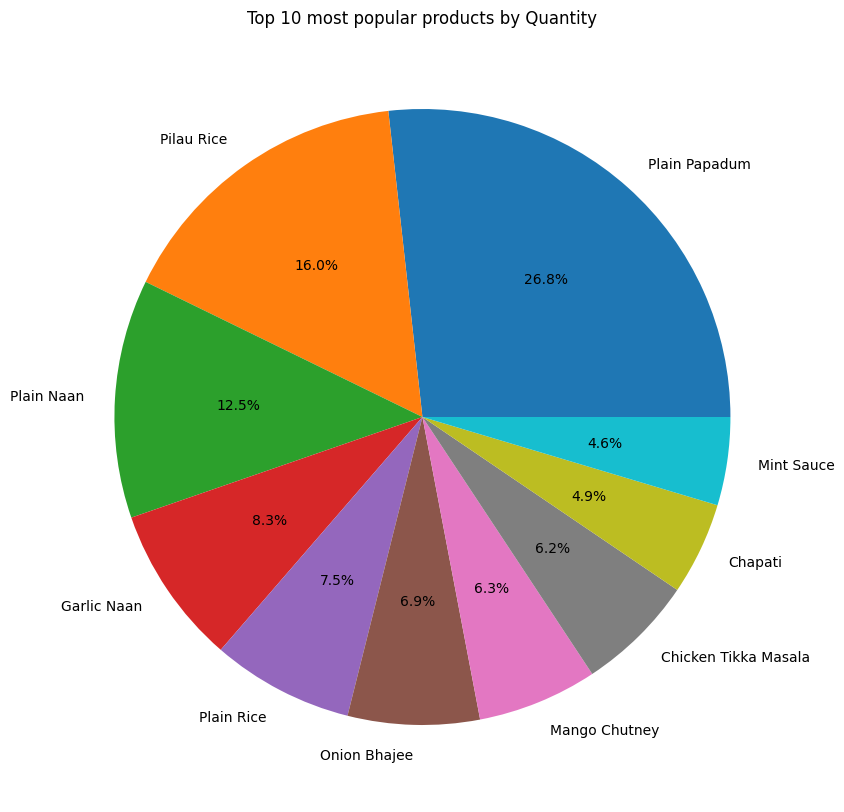

In [66]:
searched_products = df.groupby("name").sum().sort_values(by="quantity", ascending=False).head(10)

plt.figure(figsize=(10, 10))
plt.title("Top 10 most popular products by Quantity")
plt.pie(searched_products["quantity"], labels=searched_products.index, autopct="%1.1f%%")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

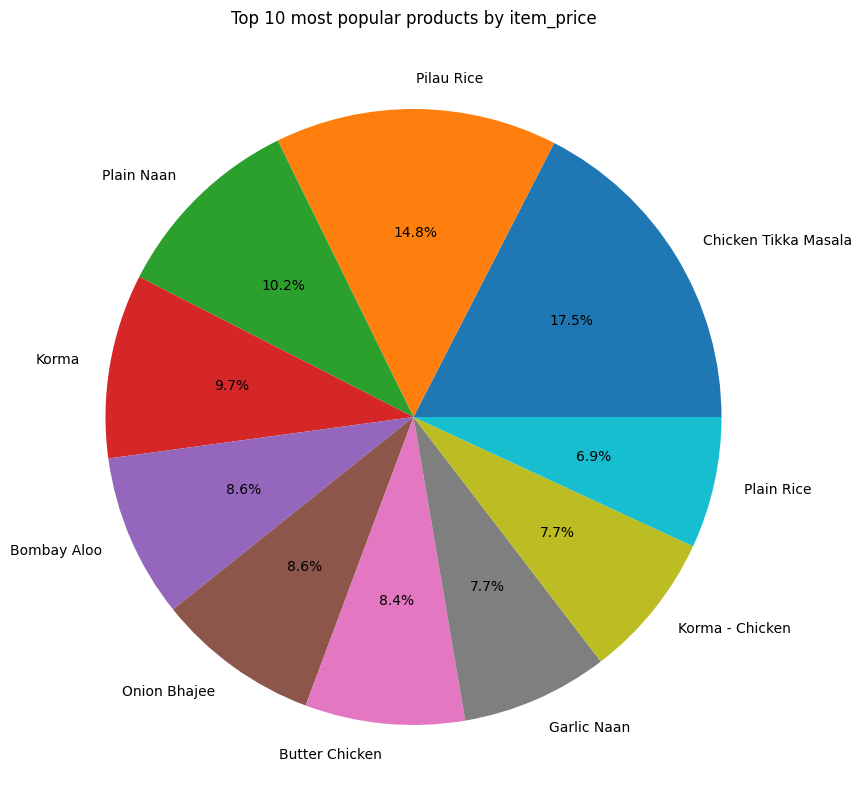

In [68]:
df["item_price"] = df["price"] * df["quantity"]
top_sold_products = df.groupby("name").sum().sort_values(by="item_price", ascending=False).head(10)

plt.figure(figsize=(10, 10))
plt.title("Top 10 most popular products by item_price")
plt.pie(top_sold_products["item_price"], labels=top_sold_products.index, autopct="%1.1f%%")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

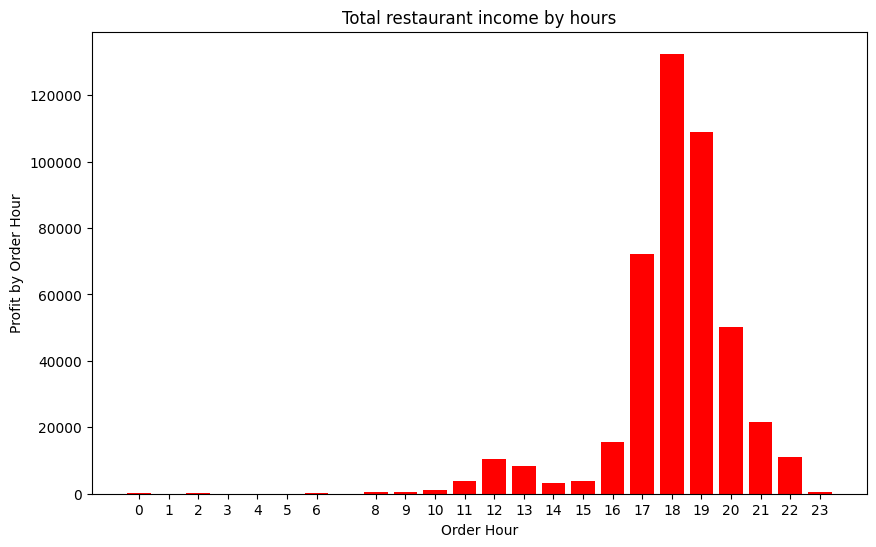

In [73]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["datetime"].dt.hour
income_by_hours = df.groupby("order_hour")["item_price"].sum()

plt.figure(figsize=(10, 6))
plt.bar(income_by_hours.index, income_by_hours.values, color="red")
plt.xlabel("Order Hour")
plt.ylabel("Profit by Order Hour")
plt.title("Total restaurant income by hours")
plt.xticks(income_by_hours.index)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

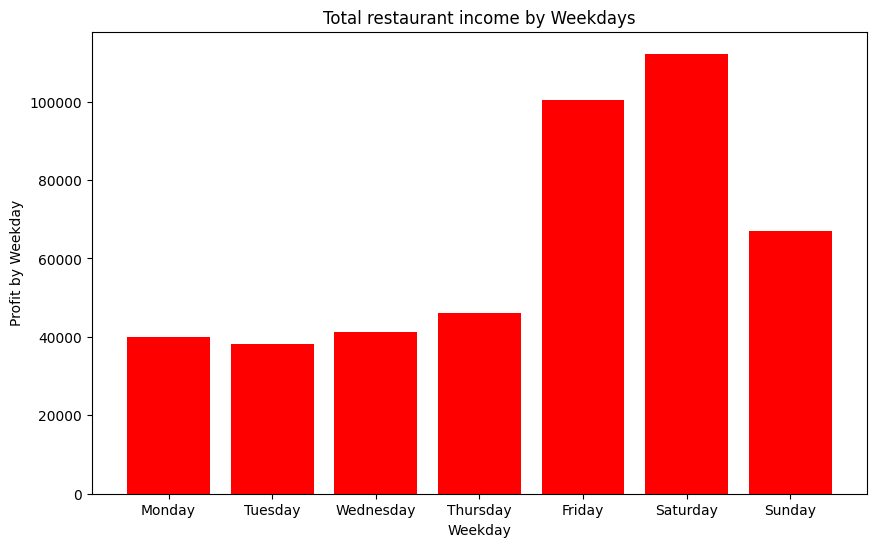

In [91]:
df["order_day"] = df["datetime"].dt.day_name()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
income_by_weekdays = df.groupby("order_day")["item_price"].sum().reindex(weekdays)

plt.figure(figsize=(10, 6))
plt.bar(income_by_weekdays.index, income_by_weekdays.values, color="red")
plt.xlabel("Weekday")
plt.ylabel("Profit by Weekday")
plt.title("Total restaurant income by Weekdays")
plt.show()